# PCEN Streaming

technique used in audio singal processing to normalize the energy across different frequency channels over time

In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [4]:
n_fft = 2048
hop_length = 512

sr = librosa.get_samplerate(librosa.ex('humpback'))
stream = librosa.stream(librosa.ex('humpback'), block_length = 16, frame_length = n_fft, hop_length = hop_length, mono =True, fill_value = 0)

pcen_blocks = list()
zi, D = None, None

# with block-wise processing
for y_block in stream:
    # compute stft
    D = librosa.stft(y_block, n_fft = n_fft, hop_length = hop_length, center = False, out = D)
    #compute PCEN
    P, zi = librosa.pcen(np.abs(D), sr = sr, hop_length = hop_length, zi = zi, return_zf = True)
    pcen_blocks.extend(np.max(P, axis = 0))
pcen_blocks = np.asarray(pcen_blocks)

In [5]:
# without block-wise processing

y, sr = librosa.load(librosa.ex('humpback'), sr = sr)
D = librosa.stft(y, n_fft = n_fft, hop_length = hop_length, center = False)

P = librosa.pcen(np.abs(D), sr = sr, hop_length = hop_length)
pcen_full = np.max(P, axis = 0)

[(30.0, 40.0)]

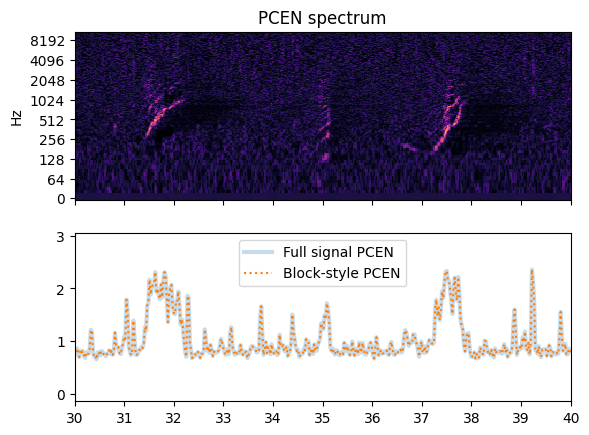

In [6]:
fig, ax = plt.subplots(nrows = 2, sharex = True)
librosa.display.specshow(P, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log', ax = ax[0])
ax[0].set(title = 'PCEN spectrum')
ax[0].label_outer()

times = librosa.times_like(pcen_full, sr = sr, hop_length = hop_length)
ax[1].plot(times, pcen_full, linewidth = 3, alpha = 0.25, label = 'Full signal PCEN')
times = librosa.times_like(pcen_blocks, sr = sr, hop_length = hop_length)
ax[1].plot(times, pcen_blocks, linestyle = ':', label = 'Block-style PCEN')
ax[1].legend()

ax[1].set(xlim = [30, 40])

